<a href="https://colab.research.google.com/github/Karthik002/Spaceship-Titanic/blob/master/Stochastic_Gradient_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import time
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [13]:
# read data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [14]:
# data processing
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
y = train_data['Transported']
X = train_data.copy().loc[:, features]
X = X.fillna(0)

In [38]:
# Stochastic Gradient Descent
st = time.time()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
print("SGD Model Accuracy: ", acc_sgd)

et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

SGD Model Accuracy:  77.14
Execution time: 0.05366039276123047 seconds


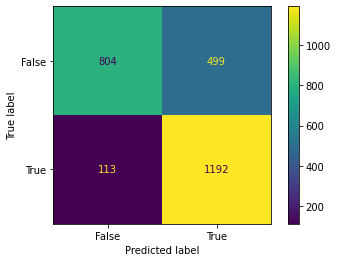

In [5]:
# Confusion Matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

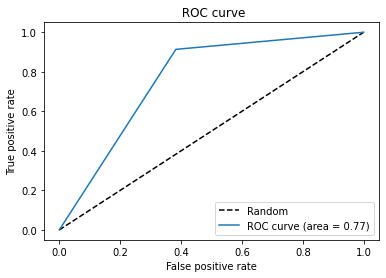

In [6]:
# ROC Curve
from sklearn.metrics import roc_curve , auc
fpr, tpr, _ = roc_curve(y_test, Y_pred)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(" ROC curve")
plt.legend(loc='best')